## Predicting mobile phone prices
***

### Introduction

In this notebook we will be using the mobile price prediction dataset provided by [Kaggle](https://www.kaggle.com/code/vikramb/mobile-price-prediction). 

The aim is to train a model that can predict the price range of a mobile phone given the features present in the dataset.

In [291]:
# Importing our modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Setting plot theme
sns.set_theme()
sns.set_style('darkgrid')

# Loading in the train and test data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Data Preprocessing

In [292]:
# Viewing a sample of the train data
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [293]:
# Variable description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [294]:
# Shape of the data
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 2000
Number of columns: 21


In [295]:
# Data Types
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [296]:
# Checking for Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Exploratory data analysis

In [297]:
# Creating a subset of the data with some features such as clock_speed, four_g etc
df_subset = df[['clock_speed', 'n_cores', 'pc', 'ram', 'price_range']]

# Plotting the data
plt.figure(figsize=[30, 30])
#sns.pairplot(df, hue='price_range')

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

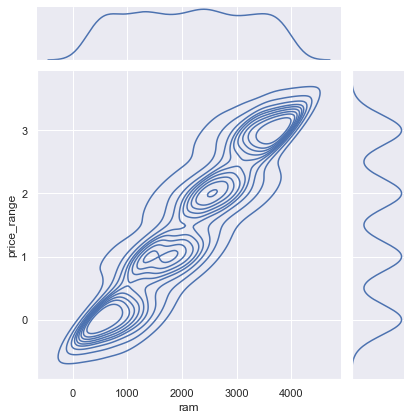

In [298]:
# Rams impact on price
plt.figure(figsize=[15, 15])
sns.jointplot(x='ram', y='price_range', data=df, kind='kde')

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

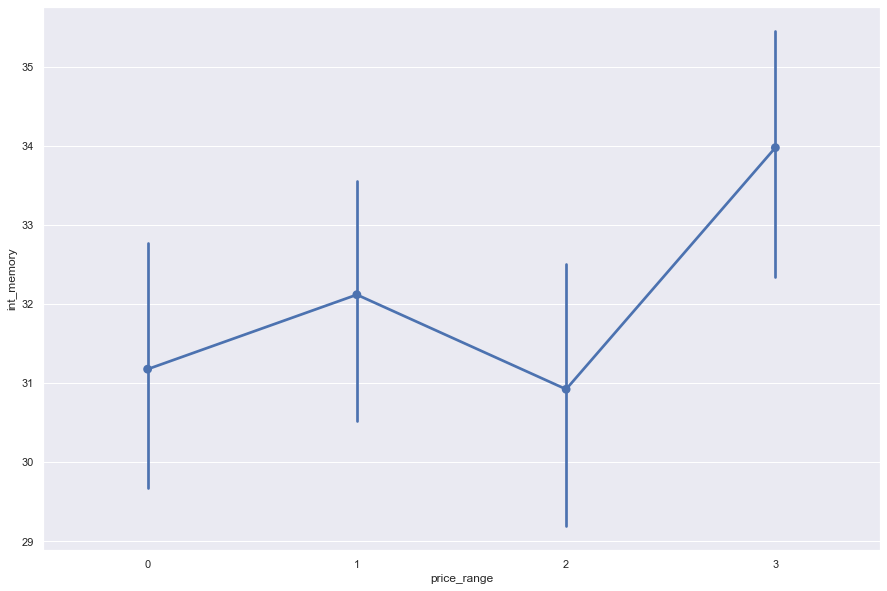

In [299]:
# Internal memory and impact on price
plt.figure(figsize=[15, 10])
sns.pointplot(x='price_range', y='int_memory', data=df)

Text(0.5, 1.0, 'Breakdown of phones with 3G')

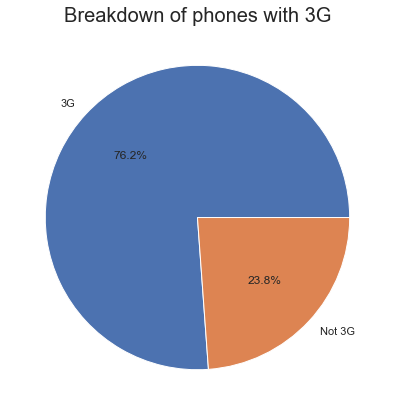

In [300]:
# % of phones that support 3G

# Obtaining breakdown of 3G vs Non 3G
three_g = df['three_g'].value_counts()

# Setting plot
plt.figure(figsize=[7, 7])

# Configuring the pie plot
plt.pie(three_g, labels=['3G', 'Not 3G'], autopct='%1.1f%%')

# Setting title
plt.title('Breakdown of phones with 3G', fontdict = {'fontsize' : 20})

Text(0.5, 1.0, 'Breakdown of phones with 4G')

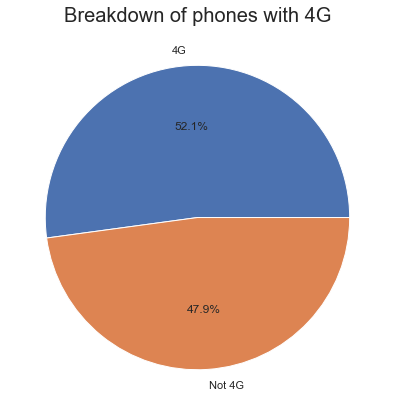

In [301]:
# % of phones that support 4G

# Obtaining breakdown of 3G vs Non 3G
three_g = df['four_g'].value_counts()

# Setting plot
plt.figure(figsize=[7, 7])

# Configuring the pie plot
plt.pie(three_g, labels=['4G', 'Not 4G'], autopct='%1.1f%%')

# Setting title
plt.title('Breakdown of phones with 4G', fontdict = {'fontsize' : 20})

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

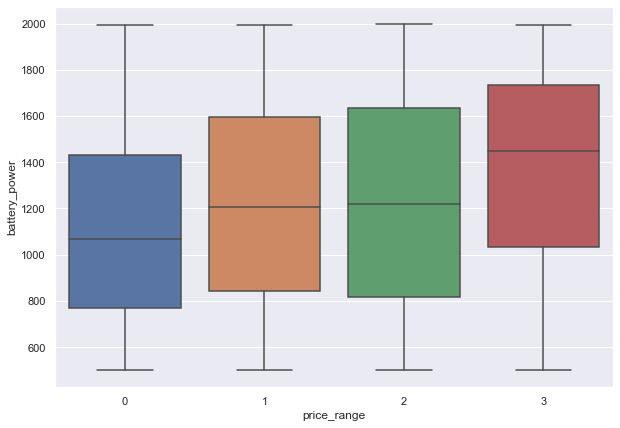

In [302]:
# Battery power vs price range

# Setting the plot size
plt.figure(figsize=[10,7])

# Configuring the plot
sns.boxplot(x='price_range', y='battery_power', data=df)

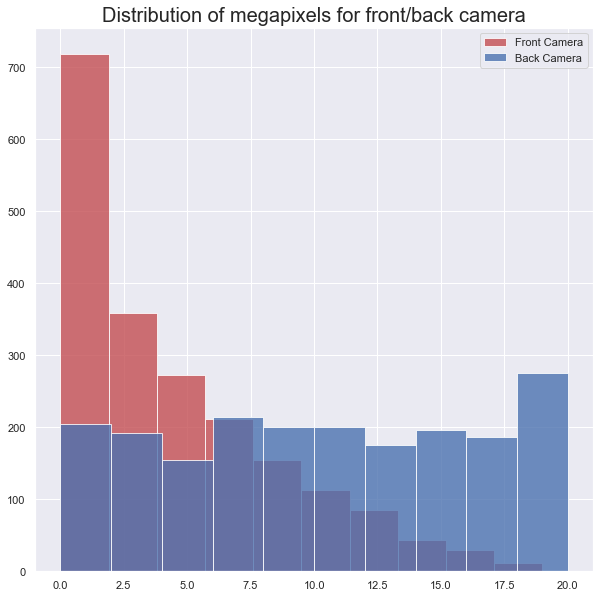

In [303]:
# Distribution of camera megapixels of front and back camera

# Setting the plot size
plt.figure(figsize=[10,10])

# Histogram of front camera
df['fc'].hist(alpha=0.8, color='r', label='Front Camera')

# Histogram of back camera
df['pc'].hist(alpha=0.8, color='b', label='Back Camera')

# Detailing plot
plt.title('Distribution of megapixels for front/back camera',fontdict = {'fontsize' : 20})
plt.legend()

### Building the model

In [304]:
# Creating our features df
X = df.drop('price_range', axis=1)

# Creating the target df
y = df['price_range']

# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [305]:
# Creating & Training the linear regression model

# Initialise the linear regression model
lm = LinearRegression()

# Training the model
lm.fit(X_train, y_train)

# Scoring the model
lm_score = lm.score(X_test, y_test)

print('Score of the linear regression model:', lm_score)

Score of the linear regression model: 0.9077139501473082


Text(0, 0.5, 'Model Score')

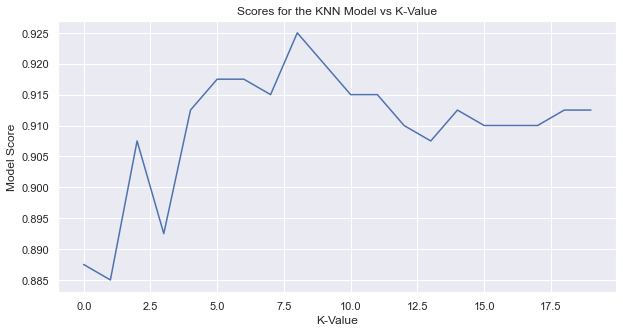

In [306]:
# Creating & Training the KNN model

# Training the KNN Model for different values of neighbours

knn_scores = []
for i in range(1,21):
    # training the model
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fitting the model
    knn.fit(X_train, y_train)
    # Calculating the score and adding it to our list
    knn_scores.append(knn.score(X_test, y_test))   

# Plotting the scores vs K values

plt.figure(figsize=[10,5])

# Configuring the plot
sns.lineplot(data=knn_scores)

# formatting the plot
plt.title('Scores for the KNN Model vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Model Score')

In [307]:
# Training the model with optimal K-Value
knn = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
knn.fit(X_train, y_train)

# Scoring the model
knn_score = knn.score(X_test, y_test)

print('Score of the KNN model:', knn_score)

Score of the KNN model: 0.925


In [308]:
# Creating & Training the Decision tree model

# Initialising the model
dtree = DecisionTreeClassifier()

# Fitting the model
dtree.fit(X_train, y_train)

# Scoring the model
dtree_score = dtree.score(X_test, y_test)

print('Score of the decision tree model:', dtree_score)

Score of the decision tree model: 0.845


In [309]:
# Creating & Training the Random tree model

# Initialising the model
rfc = RandomForestClassifier()

# Fitting the model
rfc.fit(X_train, y_train)

# Scoring the model
rfc_score = rfc.score(X_test, y_test)

print('Score of the random forrest classifer model:', rfc_score)

Score of the random forrest classifer model: 0.8675


#### Conclusion

The KNN Model was the best performing

In [310]:
# Calculating the classification report for KNN

# Obtaining predicted values
pred = knn.predict(X_test)

# Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        92
           1       0.90      0.95      0.92        96
           2       0.87      0.91      0.89       106
           3       0.97      0.89      0.93       106

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



<AxesSubplot:>

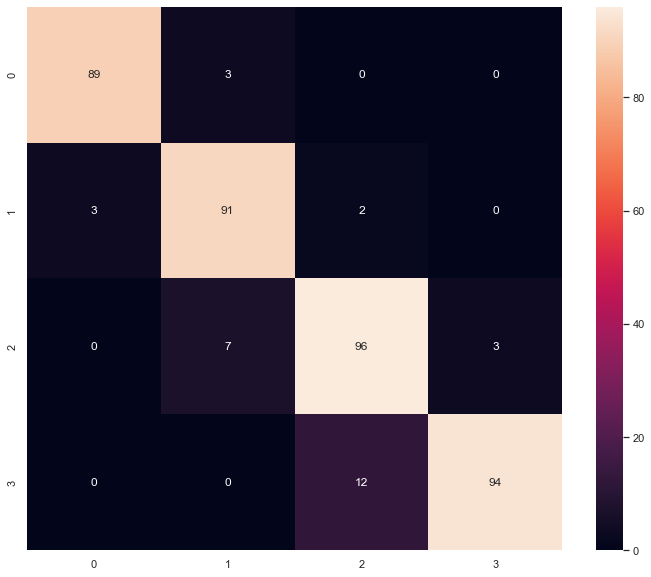

In [311]:
# Calculating the confusion matrix
matrix = confusion_matrix(y_test, pred)

# Plotting the matrix 
plt.figure(figsize=[12,10])
sns.heatmap(matrix, annot=True)

#### Appending our Test Dataframe with the predicted price ranges

In [312]:
# Dropping the second ID column
df_test = df_test.drop('id', axis=1)

# Viewing a sample of the data
df_test.head()




,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [313]:
# Using the KNN Model to predict price range
pred_price = knn.predict(df_test)

# Adding predictd price to df_test
df_test['price_range'] = pred_price

# Viewing a sample of the data
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
